In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("scores.txt", names=['dimCount', 'scores', 'eps'], sep=";")

df.head()

,dimCount,scores,eps
0,0,0,0
1,1,"0,0,0,1,1,0,0.965494,0,0,0,0,0.979515,1,0,0.93...","0.02,0.02,0.02,0.123835,0.0716636,0.02,0.02,0...."
2,2,"0,0.954016,0,0,0,0,0,0,0.937891,0,0.908265,0,0...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
3,3,"0,0,0.933916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.960...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
4,4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dimCount  500 non-null    int64 
 1   scores    500 non-null    object
 2   eps       500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [4]:
df['scores'] = df['scores'][df['scores'] != '0']
df['eps'] = df['eps'][df['eps'] != '0']
df = df.dropna()

In [5]:
df.head(30)

,dimCount,scores,eps
1,1,"0,0,0,1,1,0,0.965494,0,0,0,0,0.979515,1,0,0.93...","0.02,0.02,0.02,0.123835,0.0716636,0.02,0.02,0...."
2,2,"0,0.954016,0,0,0,0,0,0,0.937891,0,0.908265,0,0...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
3,3,"0,0,0.933916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.960...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
4,4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
5,5,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
6,6,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
7,7,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0..."
8,8,"0,0,0,0,0,0,0,0,0","0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02"


In [6]:
df['scores'] = df['scores'].map(lambda a: a.split(','))
df['eps'] = df['eps'].map(lambda a: a.split(','))

In [7]:
df['scores'] = df['scores'].map(lambda a: np.array(a).astype(float))
df['eps'] = df['eps'].map(lambda a: np.array(a).astype(float))

In [8]:
df.head()

,dimCount,scores,eps
1,1,"[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.965494, 0.0, ...","[0.02, 0.02, 0.02, 0.123835, 0.0716636, 0.02, ..."
2,2,"[0.0, 0.954016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."
3,3,"[0.0, 0.0, 0.933916, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."
5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."


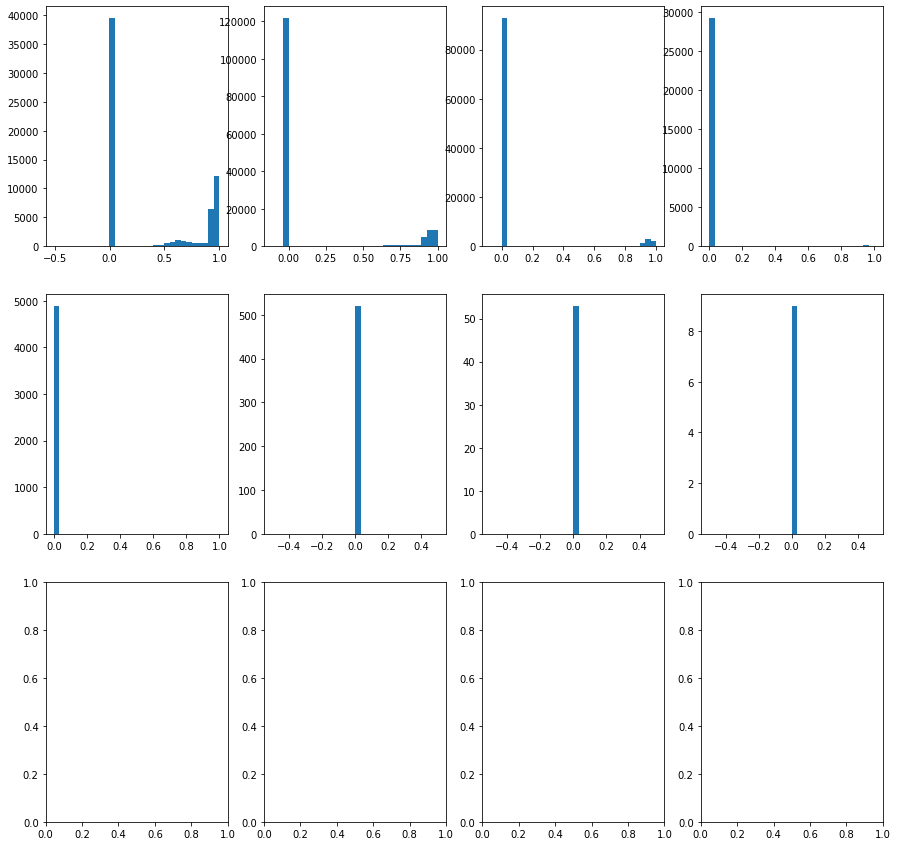

In [9]:
nEntries = df.shape[0]

fig, axs = plt.subplots(int(nEntries / 4 + 1), 4, figsize=(15, 15))

i = 0

for index, row in df.T.iteritems():
    axs[int(i / 4), int(i % 4)].hist(row['scores'], bins=30)

    i = i + 1

(array([8.14100e+03, 3.80000e+01, 1.06000e+02, 3.24000e+02, 6.37000e+02,
        1.42100e+03, 1.20000e+01, 3.07185e+05, 2.05800e+03, 3.70000e+01,
        7.50000e+02, 1.00000e+00, 1.40000e+01, 7.21000e+02, 5.60000e+01,
        1.80000e+01, 8.80000e+02, 2.00000e+00, 2.40000e+01, 9.59000e+02,
        0.00000e+00, 1.10000e+02, 4.30000e+01, 1.26900e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.00000e+01, 1.76000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.41000e+02, 2.08900e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.37000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50420e+04]),
 array([0.00214748, 0.00458123, 0.00701498, 0.00944873, 0.01188248,
        0.01431623, 0.01674998, 0.01918373, 0.02161748, 0.02405123,
        0.02648498, 0.02891873, 0.03135248, 0.03378624, 0.03621999,
        0.03865374, 0.04108749, 0.04352124, 0.04595499, 0.048388

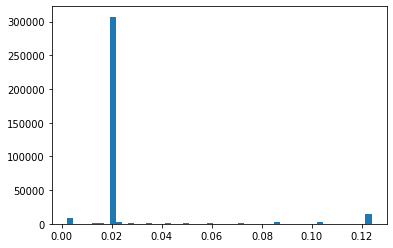

In [10]:
epsilons = []

for date, eps in df.iterrows():
    epsilons.extend(eps['eps'])

plt.hist(epsilons, bins=50)

In [11]:
counter = 0

for scores in df['scores']:
    counter = counter + len(scores)

print("Total Scores: " + str(counter))

Total Scores: 347448
